Whenever new data points are added to the existing data, we need to perform the same preprocessing steps again before we can use the machine learning model to make predictions. This becomes a tedious and time-consuming process!

An alternate to this is creating a machine learning pipeline that remembers the complete set of preprocessing steps in the exact same order. So that whenever any new data point is introduced, the machine learning pipeline performs the steps as defined and uses the machine learning model to predict the target variable.

This is exactly what we are going to cover in this article – design a machine learning pipeline and automate the iterative processing steps.

Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


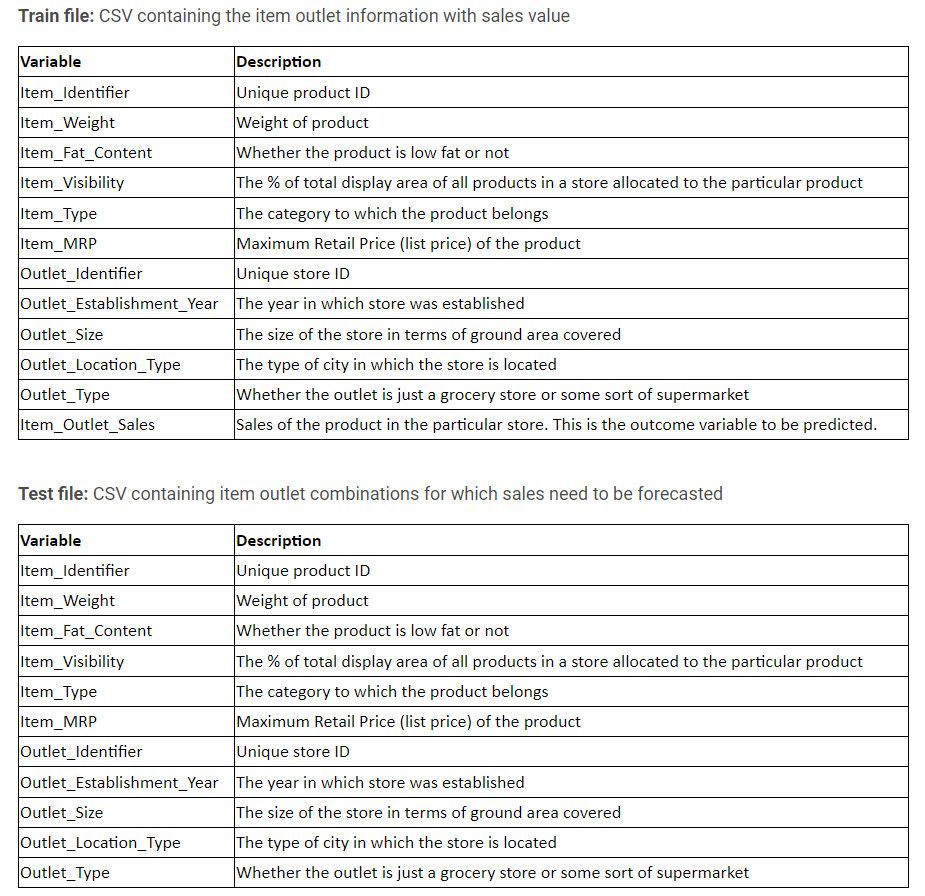

In [37]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read the train data
train_data = pd.read_csv('trainbigmart.csv')

train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



In [40]:
# impute missing values in item weight by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

# impute outlet size in training data by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

In [41]:
# check for the null values
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
train_data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [45]:
train_data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [46]:
train_data["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [47]:
train_data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [48]:
train_data["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type, 

Outlet_Identifier

Outlet_Size, 

Outlet_Location_Type, and

Outlet_Type

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type'] 
le = LabelEncoder()
# apply le on categorical feature columns
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [16]:
train_data["Outlet_Location_Type"].unique()

array([0, 2, 1])

In [17]:
train_data["Item_Type"].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [18]:
train_data["Outlet_Type"].unique()

array([1, 2, 0, 3])

In [ ]:
train_data["Outlet_Establishment_Year"].unique()

In [ ]:
pip install category_encoders

In [49]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)

In [50]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.300,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.920,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.500,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.200,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.930,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0,0,0,0,0.056783,0,0,...,1,0,0,1,0,1,0,0,0,2778.3834
8519,FDS36,8.380,0,1,0,0,0,0.046982,0,0,...,0,0,0,0,1,1,0,0,0,549.2850
8520,NCJ29,10.600,1,0,0,0,0,0.035186,0,0,...,0,1,0,0,1,1,0,0,0,1193.1136
8521,FDN46,7.210,0,1,0,0,0,0.145221,0,0,...,0,0,0,1,0,0,1,0,0,1845.5976


In [25]:
train_data["Item_MRP"].min() 

31.29

Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [51]:
from sklearn.preprocessing import StandardScaler
# create an object of the StandardScaler
scaler = StandardScaler()

# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [52]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.300,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.920,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.500,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.200,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.930,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0,0,0,0,0.056783,0,0,...,1,0,0,1,0,1,0,0,0,2778.3834
8519,FDS36,8.380,0,1,0,0,0,0.046982,0,0,...,0,0,0,0,1,1,0,0,0,549.2850
8520,NCJ29,10.600,1,0,0,0,0,0.035186,0,0,...,0,1,0,0,1,1,0,0,0,1193.1136
8521,FDN46,7.210,0,1,0,0,0,0.145221,0,0,...,0,0,0,1,0,0,1,0,0,1845.5976


Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [53]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable 
x = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(x, y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

Great, we have our train and validation sets ready. Let us train a linear regression model on this data and check it’s performance on the validation set. To check the model performance, we are using RMSE as an evaluation metric.

In [54]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1120.4190409136975
RMSE on test data:  1148.742609749635


In [57]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  897.989282314611
RMSE on test data:  1114.260857692586


Feature Importance

After the preprocessing and encoding steps, we had a total of 45 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is – by using 45 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

The idea is to have a less complex model without compromising on the overall model performance.

Following is the code snippet to plot the n most important features of a random forest mode

In [33]:
model_RFR.feature_importances_,

(array([0.02485973, 0.00744887, 0.05123886, 0.02380365, 0.51453114,
        0.0059732 , 0.03201382, 0.00197579, 0.00241327, 0.33574166]),)

In [34]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))

feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)

feat_importances

Item_Weight                  0.024860
Item_Fat_Content             0.007449
Item_Visibility              0.051239
Item_Type                    0.023804
Item_MRP                     0.514531
Outlet_Identifier            0.005973
Outlet_Establishment_Year    0.032014
Outlet_Size                  0.001976
Outlet_Location_Type         0.002413
Outlet_Type                  0.335742
dtype: float64

<Figure size 720x504 with 0 Axes>

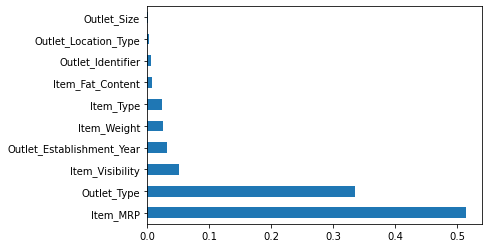

In [36]:
feat_importances.nlargest(10).plot(kind='barh');

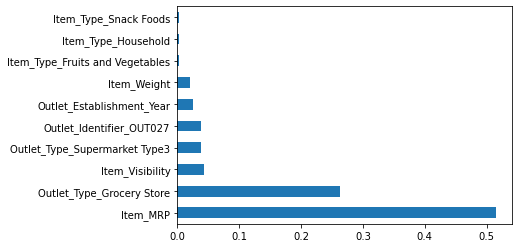

In [61]:
#for 45 input columns
feat_importances.nlargest(10).plot(kind='barh');

In [58]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))

feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)

feat_importances

Item_Weight                        0.020805
Item_Fat_Content_Low Fat           0.002222
Item_Fat_Content_Regular           0.002091
Item_Fat_Content_low fat           0.001145
Item_Fat_Content_LF                0.001576
Item_Fat_Content_reg               0.000703
Item_Visibility                    0.042981
Item_Type_Dairy                    0.002446
Item_Type_Soft Drinks              0.002658
Item_Type_Meat                     0.001583
Item_Type_Fruits and Vegetables    0.003211
Item_Type_Household                0.002993
Item_Type_Baking Goods             0.002476
Item_Type_Snack Foods              0.002778
Item_Type_Frozen Foods             0.002538
Item_Type_Breakfast                0.001840
Item_Type_Health and Hygiene       0.001878
Item_Type_Hard Drinks              0.001505
Item_Type_Canned                   0.001814
Item_Type_Breads                   0.001116
Item_Type_Starchy Foods            0.002139
Item_Type_Others                   0.000277
Item_Type_Seafood               

<Figure size 720x504 with 0 Axes>

In [62]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.9916554012883
RMSE on test data:  1117.6036288757123


In [63]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x_if, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x_if)
predict_test  = model_LR.predict(test_x_if)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.9916554012883
RMSE on test data:  1117.6036288757123


Now, this is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 10 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.

